In [106]:
#importing the required packs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from skimage import color
from skimage import io
from imutils import paths



In [107]:
import tensorflow as tf
import keras


In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(512, 512)


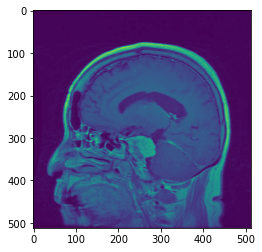

In [142]:
#1. IMAGE PRE-PROCESSING
#The actions in this section will help the main SVM model to work with the images provided and preferably also reduce the
# size/shape of the data so that the memory of the code will not exceed the limit Jupyter Notebook has. 

#Creating a path for the source dataset (which are the images) and storing it in a list.
path=(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\dataset\image")
images_list= []
images_paths = sorted(list(paths.list_images(path)))

#One of our first tasks will be to convert the pixels of the images into an array form. 
#To do this, we must first make sure that the images provided are in grayscale.
for path in images_paths:
    file=cv2.imread(path)
    images_grayscale = cv2.cvtColor(file,cv2.COLOR_BGR2GRAY)
    images_list.append(images_grayscale)


    
plt.imshow(images_list[0])
print(images_list[0].shape)

#This prepares the labels so they can be processed: 
file_labels = pd.read_csv(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\dataset\label.csv")
Images = []
Labels = []

In [110]:
file_labels = pd.read_csv(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\dataset\label.csv")


In [111]:
all_labels=list(set(file_labels['label'].tolist()))
print('All possible labels:', all_labels)
labels_map = {all_labels[x]:x for x in range (len(all_labels))}
print(labels_map)

All possible labels: ['glioma_tumor', 'no_tumor', 'pituitary_tumor', 'meningioma_tumor']
{'glioma_tumor': 0, 'no_tumor': 1, 'pituitary_tumor': 2, 'meningioma_tumor': 3}


In [112]:
#One hot encoding
from tensorflow import one_hot
one_hot_matrix = np.zeros([len(file_labels['file_name'].tolist()),len(all_labels)])
for x in range(one_hot_matrix.shape[0]):
    one_hot_matrix[x, labels_map[file_labels['label'].iloc[x]]]=1
                

In [169]:
print(one_hot_matrix)
encoded_labels=one_hot_matrix

for x in range (0,3000):
    Images.append(images_list[x])

Labels.append(one_hot_matrix)


[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [170]:
Images=np.array(Images)

print(Images.shape)

(3000, 512, 512)


In [138]:
#image_array = cv2.resize(img_array, (img_size,img_size))
#print(Images.shape)
#Images_normalized=(Images)/255.0
#print(Images_normalized.shape)
#Images_reshaped=Images_normalized.reshape(-1,128,128,1)
#print(Images_reshaped.shape)


(3000, 512, 512)
(3000, 512, 512)
(48000, 128, 128, 1)


In [171]:
Images, encoded_labels = shuffle(Images,encoded_labels)
x_train, x_test, y_train, y_test = train_test_split(Images,encoded_labels, train_size=0.8, random_state=1)

In [172]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2400, 512, 512)
(2400, 4)
(600, 512, 512)
(600, 4)


In [181]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D

In [26]:
#input_layer = Input((30,24,48))

#model = Conv2D(20,(5,5), input_shape = (30,24,48), activation = "relu", strides = 1, padding = "valid")(input_layer)
#model = MaxPooling2D(pool_size=(2,2))(model)        
#model = Conv2D(50, (5,5), use_bias = 50)(model)    
#model = MaxPooling2D(pool_size=(2,2))(model)  
#model = Flatten()(model)
#model = Dense(20, activation = "relu")(model)
#model = tf.expand_dims(model, axis=-1)
#model = LSTM(50, activation="relu", return_sequences=True)(model)

In [193]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[512,512,1]))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=20, activation="relu"))
model.add(Dense(units=10, activation="relu"))
model.add(Dense(units=4, activation="softmax"))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
68/68 [==============================] - 763s 11s/step - loss: 11.8382 - accuracy: 0.4120 - val_loss: 0.9843 - val_accuracy: 0.6250
Epoch 2/10
68/68 [==============================] - 790s 12s/step - loss: 0.8495 - accuracy: 0.6986 - val_loss: 0.8286 - val_accuracy: 0.6708
Epoch 3/10
68/68 [==============================] - 645s 9s/step - loss: 0.6305 - accuracy: 0.7681 - val_loss: 0.8531 - val_accuracy: 0.7417
Epoch 4/10
68/68 [==============================] - 1372s 20s/step - loss: 0.4735 - accuracy: 0.8347 - val_loss: 0.7219 - val_accuracy: 0.8000
Epoch 5/10
68/68 [==============================] - 1442s 21s/step - loss: 0.3439 - accuracy: 0.8736 - val_loss: 0.8387 - val_accuracy: 0.7750
Epoch 6/10
68/68 [==============================] - 1243s 18s/step - loss: 0.2627 - accuracy: 0.9093 - val_loss: 0.8360 - val_accuracy: 0.8000
Epoch 7/10
68/68 [==============================] - 1146s 17s/step - loss: 0.1922 - accuracy: 0.9454 - val_loss: 0.9945 - val_accuracy: 0.7583
Ep

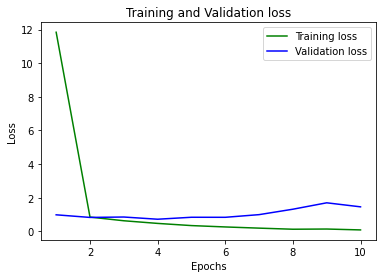

In [215]:
loss_training = history.history['loss']
loss_validation = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_training, 'g', label='Training loss')
plt.plot(epochs, loss_validation, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

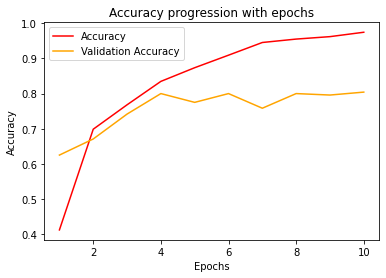

In [228]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy, 'r', label='Accuracy')
plt.plot(epochs, validation_accuracy, 'orange', label='Validation Accuracy')
plt.title('Accuracy progression with epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [229]:
from tabulate import tabulate
col_names = ["Loss","Validation Loss", "Accuracy","Validation Accuracy"]
print(tabulate(history.history, headers=col_names))

      Loss    Validation Loss    Accuracy    Validation Accuracy
----------  -----------------  ----------  ---------------------
11.8382              0.412037    0.984344               0.625
 0.849526            0.698611    0.828644               0.670833
 0.63049             0.768056    0.853117               0.741667
 0.473515            0.834722    0.721924               0.8
 0.34391             0.873611    0.838722               0.775
 0.262651            0.909259    0.836014               0.8
 0.192226            0.94537     0.994498               0.758333
 0.127054            0.955093    1.31711                0.8
 0.138832            0.962037    1.698                  0.795833
 0.0863073           0.974537    1.45835                0.804167


In [237]:
model_2 = Sequential()
model_2.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[512,512,1]))
model_2.add(MaxPool2D())
model_2.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same'))
model_2.add(MaxPool2D())
model_2.add(Flatten())
model_2.add(Dense(units=20, activation="relu"))
model_2.add(Dense(units=10, activation="relu"))
model_2.add(Dense(units=4, activation="softmax"))
model_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_2 = model.fit(x_train,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
60/60 [==============================] - 1191s 20s/step - loss: 0.0074 - accuracy: 0.9984 - val_loss: 0.9965 - val_accuracy: 0.9208
Epoch 2/10
60/60 [==============================] - 1201s 20s/step - loss: 0.0097 - accuracy: 0.9979 - val_loss: 0.7620 - val_accuracy: 0.9146
Epoch 3/10
60/60 [==============================] - 1351s 23s/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.7851 - val_accuracy: 0.9187
Epoch 4/10
60/60 [==============================] - 1280s 21s/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.8406 - val_accuracy: 0.9187
Epoch 5/10
60/60 [==============================] - 1274s 21s/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.9446 - val_accuracy: 0.9229
Epoch 6/10
60/60 [==============================] - 1213s 20s/step - loss: 0.0057 - accuracy: 0.9974 - val_loss: 0.7001 - val_accuracy: 0.9042
Epoch 7/10
60/60 [==============================] - 1119s 19s/step - loss: 0.0172 - accuracy: 0.9969 - val_loss: 0.9438 - val_accuracy: 0.9104

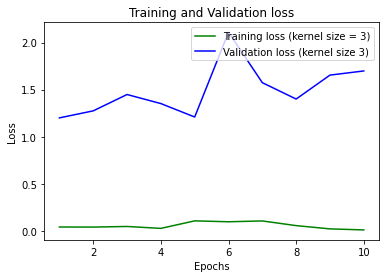

In [236]:
loss_training = history_2.history['loss']
loss_validation = history_2.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_training, 'g', label='Training loss (kernel size = 3)')
plt.plot(epochs, loss_validation, 'b', label='Validation loss (kernel size 3)')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()